# Introduction
We will be looking at bike rentals from communal bike sharing stations in Washington D.C. We will be looking at a dataset of bike rentals, where each row represents the number of bike rentals for a single hour of a single day. Our goal for this project is to predict the total number of bikes rented in a given hour based on features such as weather and the day of the week. We wil be employing machine learning models to make these predictions, and evaluating the models' performance.

# Exploring the Existing Data
Let us examine the data compiled by Hadi Fanaee-T at the University of Porto, and downloaded from the [University of California Irvine's website of datasets](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 

In [90]:
import pandas as pd

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Our target column is the cnt, or count, column in bike_rentals. Let us examine the distribution of total rentals.

Text(2,7200,'Histogram for the number of bikes rented in a\ngiven hour in Washington D.C.')

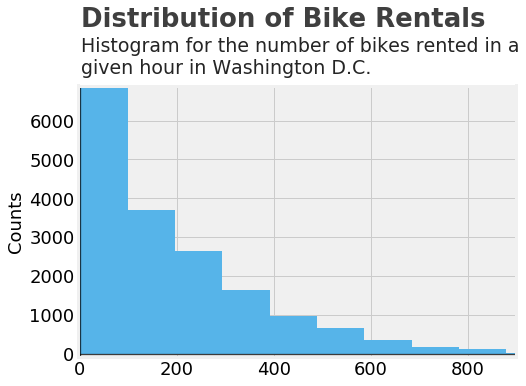

In [91]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

rental_histogram = bike_rentals['cnt'].hist(color = [86/255,180/255,233/255], figsize = (7, 5))
rental_histogram.axhline(0, color = 'black', linewidth = 1.3, alpha = 0.7)
rental_histogram.axvline(0, color = 'black', linewidth = 1.3, alpha = 0.7)
rental_histogram.tick_params(labelsize = 18)
rental_histogram.set_xlim([-4, 900])
rental_histogram.set_ylim([-80,6900])
rental_histogram.set_ylabel('Counts', fontsize = 18)
rental_histogram.text(2, 8400, s = 'Distribution of Bike Rentals', fontsize = 26,
                      weight = 'bold', alpha = .75)
rental_histogram.text(x = 2, y = 7200, s = 'Histogram for the number of bikes rented in a\ngiven hour in Washington D.C.',
               fontsize = 19, alpha = .85)

Let us also explore how each column in bike_rentals is correlated with cnt, our target column. This will prove useful for when we train and test machine learning models with a selection of features.

In [92]:
bike_corr = bike_rentals.corr()
cnt_corr = bike_corr['cnt']
cnt_corr

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

We will not count the casual and registered columns, because the sum of the values in those two columns equal the values in the cnt column. Of the remaining columns, some of the features with notable correlation to the target column include temp, atemp (adjusted temperature), hr (hour the rentals occurred), and humidity. There seems to be very little correlation between the cnt column and columns like weekday (day of the week), workingday, and windspeed.

## Feature Calculation: Making Time Meaningful to Machines
It is helpful to calculate features before applying machine learning models, as the addition of new information or the distilling of existing information can improve our models' accuracy. 

For example, the hr column ranges from 1 to 24, signifying the hours during which bikes are rented. A machine will treat each hour differently, without considering that certain hours are related. It may be helpful to label hours based on time of day (morning, afternoon, evening, and night) and bundle them into these groups, enabling the model to make better decisions.

In [93]:
def assign_label(hour):
    """Assign a label (1 to 4) to a numerical value for an hour."""
    if hour >= 6 and hour < 12:
        label = 1    # Morning
    elif hour >= 12 and hour < 18:
        label = 2    # Afternoon
    elif hour >= 18 and hour < 24:
        label = 3    # Evening
    else:
        label = 4    # Night
        
    return label

# Add a new column to bike_rentals containing the label for the hour of the day
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

bike_rentals.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


# Predicting Bike Rentals with Machine Learning
Before we apply machine learning algorithms, let us split the data into training and testing datasets. This allows us to evaluate the accuracy of a model without allowing the model to overfit.

We will be using the root mean square error as the error metric, as our target variable, total number of bike rentals (cnt), is a continuous variable.

In [94]:
import numpy as np

# Select 80% of the rows in bike_rentals to be the training set
train = bike_rentals.sample(n = int(np.round(0.8 * bike_rentals.shape[0])))

# The rest of the rows are in test
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Applying Linear Regression
Let us begin by applying lienar regression to the data. This model works best when the features are linearly correlated to the target and are also independent. The advantage to linear regression is that it is fairly resistant to overfitting, but it can potentially underfit the data.

In [259]:
# Create a list of predictor features. Keep columns with correlation of > 0.1 with cnt, and exclude
# columns like casual, dteday, and registered.
features = list(cnt_corr[np.abs(cnt_corr) > .1].index)
features.append('time_label')

for remove in ['registered', 'cnt', 'dteday', 'casual']:
    if remove in features:
        features.remove(remove)
        
# Import from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

# Train and test the model
lr.fit(train[features], train['cnt'])
prediction = lr.predict(test[features])

rmse = mean_squared_error(test['cnt'], prediction) ** .5

print(rmse)
print(bike_rentals['cnt'].describe())

136.61922388697485
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


The root mean square error between the bike rental counts in our test dataset and our predictions is 136.62, or roughly 137 bikes. If we look at our histogram and bike_rentals['cnt'].describe(), we notice that a large majority of our observations report bike rentals below 200 or 300 (281 bike rentals is the 75th percentile), such that an error of 136.62 indicates our predictions may give us misleading numbers. Let us turn to other machine learning models, potentially more complex, to see if the other models can give more accurate predictions, or if linear regression is the best we can do with this dataset. Our hope that a more complex model will reduce the bias of our model.

## Applying Decision Trees
We will now turn to applying the decision tree algorithm and compare its error with the error from lienar regression. Decision trees tend to predict outcomes more reliably than linear regression, but they can overfit and are prone to instability.

At first, let us try out regression with a decision tree without tweaking parameters. If the model is overfitting the training data, we wish to change the parameters, such as the tree depths or number of samples in the leaves.

We want to modify our list of features, as correlation to the target column may no longer be a major factor to the decision tree algorithm.

In [260]:
from sklearn.tree import DecisionTreeRegressor

features = list(bike_rentals.columns)

for remove in ['registered', 'cnt', 'dteday', 'casual']:
    if remove in features:
        features.remove(remove)

dtr = DecisionTreeRegressor()

# Train and test using default parameters of the decision tree regressor
dtr.fit(train[features], train['cnt'])
train_prediction = dtr.predict(train[features])
train_rmse = mean_squared_error(train['cnt'], train_prediction) ** .5

prediction = dtr.predict(test[features])
test_rmse = mean_squared_error(test['cnt'], prediction) ** .5

print('In-sample error: ', train_rmse)
print('Out-of-sample error: ', test_rmse)

In-sample error:  0.0
Out-of-sample error:  56.95141571057242


Both of our errors are significantly smaller than the error from linear regression. However, the in-sample error is reportedly 0 while the out-of-sample error is roughly 57, indicating that our decision tree is overfitting the training data.

In [329]:
num_sample_leaf = np.concatenate((range(1, 10), range(10, 210, 10)))
train_vs_sample = []
test_vs_sample = []

for n in num_sample_leaf:
    dtr = DecisionTreeRegressor(min_samples_leaf = n)
    
    dtr.fit(train[features], train['cnt'])
    train_prediction = dtr.predict(train[features])
    train_vs_sample.append(mean_squared_error(train['cnt'], train_prediction) ** .5)

    prediction = dtr.predict(test[features])
    test_vs_sample.append(mean_squared_error(test['cnt'], prediction) ** .5)

Text(90,84,'Test')

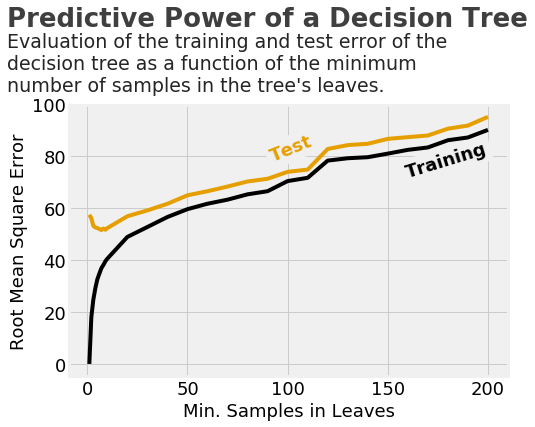

In [350]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(111)

ax.plot(num_sample_leaf, train_vs_sample, c = colors[0])
ax.plot(num_sample_leaf, test_vs_sample, c = colors[1])
ax.tick_params(labelsize = 18)
ax.set_ylabel('Root Mean Square Error', fontsize = 18)
ax.set_xlabel('Min. Samples in Leaves', fontsize = 18)

ax.text(x = -40, y = 130, s = 'Predictive Power of a Decision Tree',
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -40, y = 105, s = "Evaluation of the training and test error of the \ndecision tree as a function of the minimum \nnumber of samples in the tree's leaves.",
               fontsize = 19, alpha = .85)

ax.text(x = 158, y = 81, s = 'Training', color = colors[0], weight = 'bold', fontsize = 18, rotation = 17,
               backgroundcolor = '#f0f0f0')
ax.text(x = 90, y = 84, s = 'Test', color = colors[1], weight = 'bold', fontsize = 18, rotation = 22,
               backgroundcolor = '#f0f0f0')

We observe a minimum in the test error if the minimum number of samples in the leaves is 5. At this value, the difference in the test and training errors is not great, indicating that the model is not overfitting.

In [351]:
dtr = DecisionTreeRegressor(min_samples_leaf = 5)

# Train and test using default parameters of the decision tree regressor
dtr.fit(train[features], train['cnt'])
train_prediction = dtr.predict(train[features])
train_rmse = mean_squared_error(train['cnt'], train_prediction) ** .5

prediction = dtr.predict(test[features])
test_rmse = mean_squared_error(test['cnt'], prediction) ** .5

print('In-sample error: ', train_rmse)
print('Out-of-sample error: ', test_rmse)

In-sample error:  32.59061774855383
Out-of-sample error:  52.36793392099547


By modifying the maximum depth of our decision tree and the mininum number of samples in our tree's leaves, we have a decision tree that has a root mean square error of 52 bike rentals when the model is used to predict the number of bike rentals. This error is significantly lower than the error from linear regression, meaning this model is more accurate than linear regression. We have taken measures to reduce overfitting, so we have considered both bias and variance. 

Let us see if this error can be further improved if we consider ensembling, or employ the random forest algorithm.

## Applying Random Forest
We will now apply the random forest algorithm. We expect this model to be more accurate than both a single decision tree and linear regression. Let us begin by using the default parameters for the random forest model.

In [352]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

# Train and test the random forest model
rfr.fit(train[features], train['cnt'])
train_prediction = rfr.predict(train[features])
train_rmse = mean_squared_error(train['cnt'], train_prediction) ** .5

prediction = rfr.predict(test[features])
test_rmse = mean_squared_error(test['cnt'], prediction) ** .5

print('In-sample error: ', train_rmse)
print('Out-of-sample error: ', test_rmse)

In-sample error:  18.485764714692213
Out-of-sample error:  44.676885710632526


We have an out-of-sample error that is already smaller than the error from our tweaked single decision tree. However, we note that there is a significant difference between our in-sample and out-of-sample errors, meaning that our random forest is overfitting the data. Let us tune parameters such as the minimum samples per leaf.

In [353]:
num_sample_leaf = np.concatenate((range(1, 10), range(10, 210, 10)))
train_vs_sample = []
test_vs_sample = []

for n in num_sample_leaf:
    rfr = RandomForestRegressor(min_samples_leaf = n)
    
    rfr.fit(train[features], train['cnt'])
    train_prediction = rfr.predict(train[features])
    train_vs_sample.append(mean_squared_error(train['cnt'], train_prediction) ** .5)

    prediction = rfr.predict(test[features])
    test_vs_sample.append(mean_squared_error(test['cnt'], prediction) ** .5)

Text(0.5,0,'Min. Samples in Leaves')

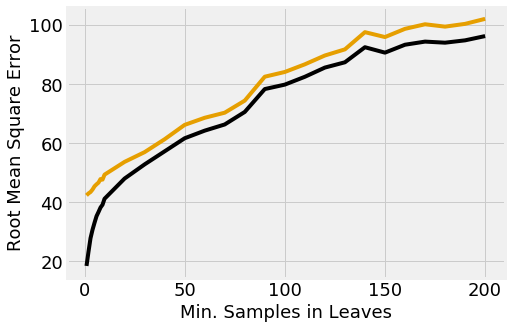

In [354]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(111)

ax.plot(num_sample_leaf, train_vs_sample, c = colors[0])
ax.plot(num_sample_leaf, test_vs_sample, c = colors[1])
ax.tick_params(labelsize = 18)
ax.set_ylabel('Root Mean Square Error', fontsize = 18)
ax.set_xlabel('Min. Samples in Leaves', fontsize = 18)

#ax.text(x = -40, y = 131, s = 'Predictive Power of a Random Forest',
#               fontsize = 26, weight = 'bold', alpha = .75)
#ax.text(x = -40, y = 126.8, s = "Evaluation of the training and test error of the \nrandom forest as a function of the minimum \nnumber of samples in the trees' leaves.",
#               fontsize = 19, alpha = .85)

#ax.text(x = 158, y = 118, s = 'Training', color = colors[0], weight = 'bold', fontsize = 18,
#               backgroundcolor = '#f0f0f0')
#ax.text(x = 158, y = 124, s = 'Test', color = colors[1], weight = 'bold', fontsize = 18,
#               backgroundcolor = '#f0f0f0')

In [367]:
rfr = RandomForestRegressor(min_samples_leaf = 4)

# Train and test the random forest model
rfr.fit(train[features], train['cnt'])
train_prediction = rfr.predict(train[features])
train_rmse = mean_squared_error(train['cnt'], train_prediction) ** .5

prediction = rfr.predict(test[features])
test_rmse = mean_squared_error(test['cnt'], prediction) ** .5

print('In-sample error: ', train_rmse)
print('Out-of-sample error: ', test_rmse)

In-sample error:  30.857046138047934
Out-of-sample error:  44.56555058751379


# Conclusion

We observe a test root mean square error of roughly 44 bike rentals when we employ a random forest algorithm with a minimum of 4 samples per leaf. This is an improvement over the use of a single decision tree, which was a massive improvement over the linear regression model. 

Here is a comparison of the number of bike rentals in our test dataset compared with our predictions.

In [373]:
rented_test = pd.DataFrame(test['cnt'])

In [374]:
rented_test['predictions'] = prediction
rented_test

,cnt,predictions
7,3,9.651587
11,56,80.552341
13,94,125.951710
19,37,71.851198
22,28,59.230296
28,3,3.529102
30,1,26.240159
35,93,80.251028
37,59,70.250823
40,65,90.977063
